In [457]:
import numpy as np
import matplotlib.pyplot as plt

In [458]:
with open('tasks/10.txt', 'r') as f:
    data = f.read().split()

data = [list(x) for x in data]

In [459]:
mapa = np.array(data)

In [460]:
start_pos = np.where(mapa == 'S')

In [461]:
start_pos

(array([92]), array([43]))

In [462]:
mapa[90:94, 41:46]

array([['J', 'F', '-', '-', 'J'],
       ['7', 'L', '-', '-', '-'],
       ['|', 'F', 'S', '-', '-'],
       ['|', '|', 'F', '-', '7']], dtype='<U1')

In [463]:
mapa

array([['7', '7', '.', ..., '7', '.', '.'],
       ['|', '-', 'L', ..., 'L', '7', 'F'],
       ['L', '7', 'L', ..., 'F', '7', 'J'],
       ...,
       ['L', 'F', '7', ..., 'L', '-', '.'],
       ['.', 'L', '.', ..., '|', '7', '7'],
       ['7', 'J', 'L', ..., 'L', 'L', '.']], dtype='<U1')

In [464]:
mapa[start_pos] = '-'
# mapa[start_pos] = 'F' # test

In [465]:
start_pos = start_pos[0][0], start_pos[1][0]
new_pos = (1, 2) # for test_2

In [466]:
new_pos = (92, 44)

In [467]:
pipe_new_coords = {
    '|': np.array(((-1, 0), (1, 0))),
    '-': np.array(((0, -1), (0, 1))),
    'L': np.array(((-1, 0), (0, 1))),
    'J': np.array(((-1, 0), (0, -1))),
    '7': np.array(((0, -1), (1, 0))),
    'F': np.array(((0, 1), (1, 0))),
}

In [468]:
def new_coords(coords_pred, coords_now):
    pipe_possible = pipe_new_coords[mapa[coords_now]]
    new_coords = coords_now + pipe_possible[0]
    if not np.array_equal(new_coords, coords_pred):
        return coords_now, tuple(new_coords)
    return coords_now, tuple(coords_now + pipe_possible[1])
    

In [469]:
def remove_extra_walls(mapa):
    mapa = np.ma.array(mapa, mask=border_mapa-1, fill_value='.')
    return mapa.filled()

In [470]:
border_mapa = np.zeros(mapa.shape, dtype=int)

In [471]:
i = 1
prev_pos = start_pos
border_mapa[(prev_pos)] = 1
while new_pos != start_pos:
    prev_pos, new_pos = new_coords(prev_pos, new_pos)
    border_mapa[(prev_pos)] = 1
    i+=1

In [472]:
mapa = remove_extra_walls(mapa)

In [473]:
mapa

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

In [474]:
print(f"Task 1: {i // 2}")

Task 1: 7107


In [420]:
new_mask = np.zeros(mapa.shape, dtype=int)

In [511]:
good_symb = 'F7|'

In [518]:
def odd_intersection(j, i):
    if i == 0 or j == 0:
        return False
    one  = sum(np.multiply([x for x in mapa[0:j-1, i] if x in good_symb], [x for x in mapa[0:j-1, i] if x in good_symb]))
    two = sum(np.multiply([x for x in mapa[j+1:mapa.shape[0], i] if x in good_symb], 
                          [x for x in mapa[j+1:mapa.shape[0], i] if x in good_symb]))
    if one % 2 == 0 or two % 2 == 0:
#         new_mask[j, i] = 0
        return False
#     if (one + two + three + four) % 2:
#         return True
    new_mask[j, i] = 1
    return True

In [513]:
len(np.where(border_mapa==0)[0])

5386

In [519]:
total = 0
for y, x in zip(*np.where(border_mapa==0)):
    if odd_intersection(y,x):
#         print(y, x)
        total += 1
#     total += odd_intersection(y,x)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

In [423]:
total

41

In [374]:
odd_intersection(0,0)

False

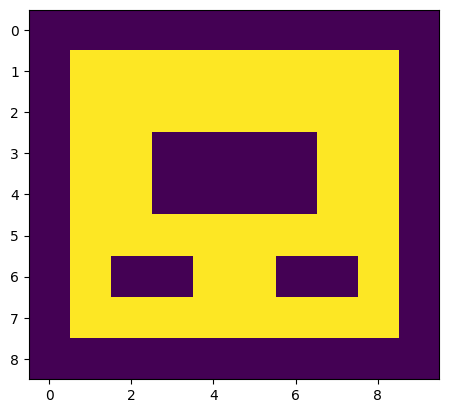

In [375]:
plt.imshow(border_mapa)

In [504]:
new_mask = np.zeros(mapa.shape, dtype=int)

In [505]:
total = 0
for y in range(mapa.shape[0]):
    opened = False
    for x in range(mapa.shape[1]):
        value = mapa[y, x]
        if value == '.' and opened:
            total += 1
            new_mask[y, x] = 1
        elif value == 'F' or value == '7' or value == '|':
            opened = not opened
        

In [503]:
total

281

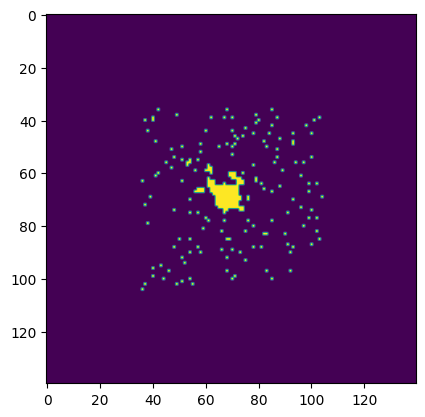

In [508]:
plt.imshow(new_mask)